In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 

In [19]:
data = pd.read_csv("C:/Users/HN362WS/Music/Udemy Python/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv")

In [20]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

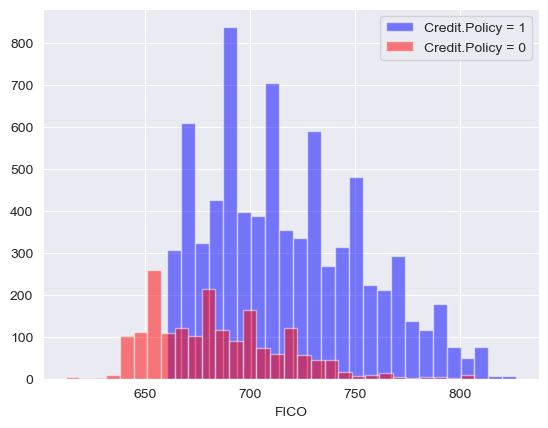

In [21]:
data[data["credit.policy"]==1]["fico"].hist(alpha = 0.5, color = "blue", bins = 30, label = "Credit.Policy = 1")
data[data["credit.policy"]==0]["fico"].hist(alpha = 0.5, color = "red", bins = 30, label = "Credit.Policy = 0")
plt.legend()
plt.xlabel("FICO")

similar figure, except this time select by the not.fully.paid column.

Text(0.5, 0, 'FICO')

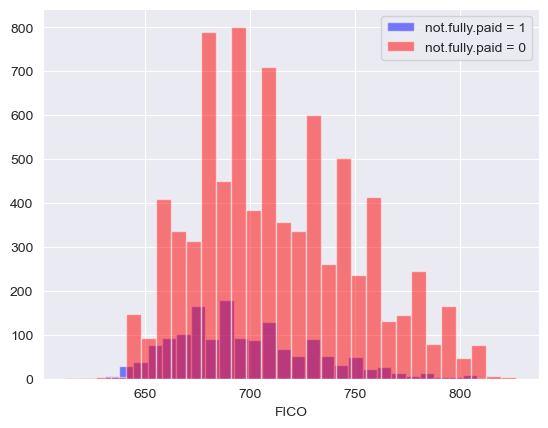

In [25]:
data[data["not.fully.paid"]==1]["fico"].hist(alpha = 0.5, color = "blue", bins = 30, label = "not.fully.paid = 1")
data[data["not.fully.paid"]==0]["fico"].hist(alpha = 0.5, color = "red", bins = 30, label = "not.fully.paid = 0")

plt.legend()

plt.xlabel("FICO")

<Axes: xlabel='count', ylabel='purpose'>

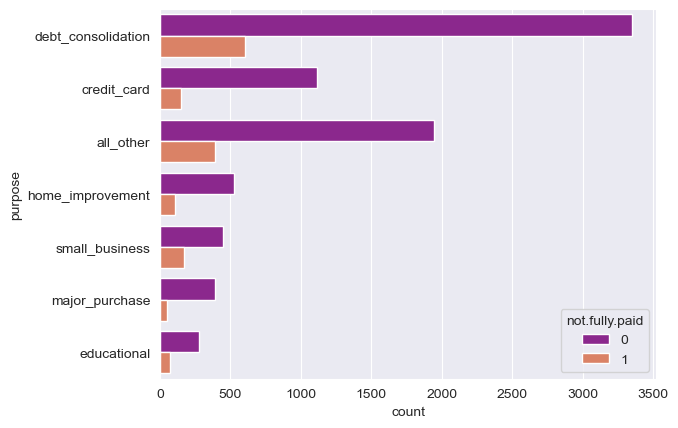

In [27]:
sns.countplot(y = "purpose", hue = "not.fully.paid", data  = data, palette = "plasma")

In [26]:
data["not.fully.paid"] = data["not.fully.paid"].astype(str)

Let's see the trend between FICO score and interest rate.

C:\Users\HN362WS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HN362WS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


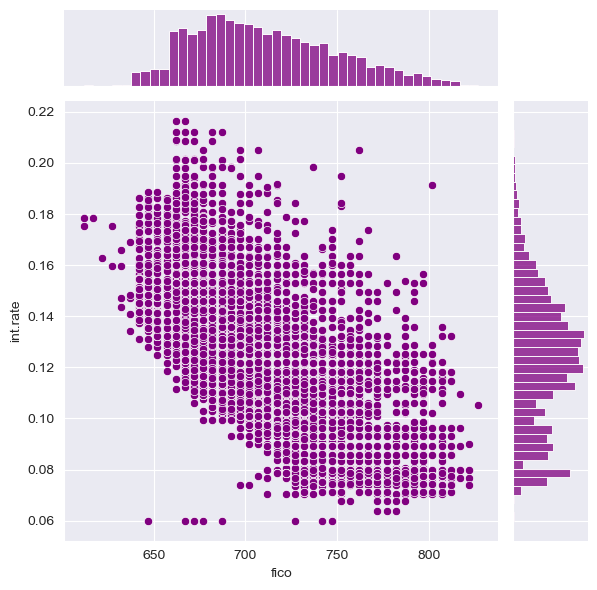

In [29]:
sns.jointplot(x = "fico", y = "int.rate", data = data, color = "purple")

trend differed between not.fully.paid and credit.policy.

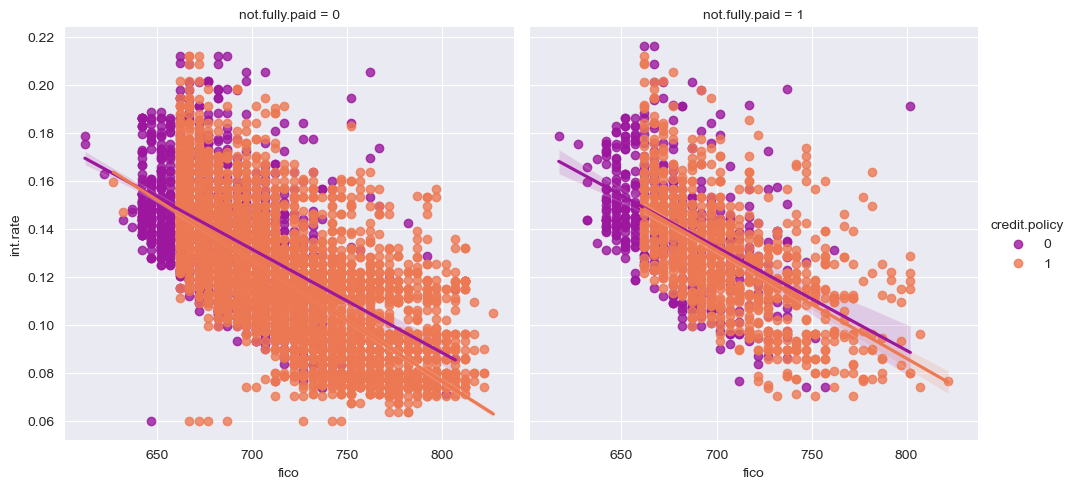

In [30]:
sns.lmplot(y = "int.rate", x = "fico", data = data, hue = "credit.policy", col = "not.fully.paid", palette = "plasma")

# Categorical Features

Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [31]:
cat_feats = ["purpose"]

In [33]:
final_data = pd.get_dummies(data, columns=cat_feats, drop_first=True).astype(int)

In [34]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,829,11,19,737,5639,28854,52,0,0,0,0,0,1,0,0,0,0
1,1,0,228,11,14,707,2760,33623,76,0,0,0,0,1,0,0,0,0,0
2,1,0,366,10,11,682,4710,3511,25,1,0,0,0,0,1,0,0,0,0
3,1,0,162,11,8,712,2699,33667,73,1,0,0,0,0,1,0,0,0,0
4,1,0,102,11,14,667,4066,4740,39,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,344,12,10,672,10474,215372,82,2,0,0,1,0,0,0,0,0,0
9574,0,0,257,11,0,722,4380,184,1,5,0,0,1,0,0,0,0,0,0
9575,0,0,97,10,13,687,3450,10036,82,8,0,0,1,0,1,0,0,0,0
9576,0,0,351,10,19,692,1800,0,3,5,0,0,1,0,0,0,1,0,0


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = final_data.drop("not.fully.paid",axis = 1)

y = final_data["not.fully.paid"]

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training a Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [41]:
predictions = dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [44]:
print(confusion_matrix(y_test,predictions))

[[2006  425]
 [ 341  102]]


# Training the Random Forest model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=600)

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# Predictions and Evaluation

In [48]:
pred = rfc.predict(X_test)

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [50]:
print(confusion_matrix(y_test,pred))

[[2421   10]
 [ 433   10]]
